In [17]:
import pandas as pd
from prophet import Prophet

In [18]:
df_basel = pd.read_csv('data/air_PM10_data_basel.csv', names=["ds", "y"], header=0)
df_basel.head()

,ds,y
0,2003-01-01,23.069
1,2003-01-07,39.465
2,2003-01-08,59.359
3,2003-01-09,54.597
4,2003-01-10,81.661


In [19]:
model_basel = Prophet()
model_basel.add_country_holidays(country_name='CH')
model_basel.fit(df_basel)

23:23:31 - cmdstanpy - INFO - Chain [1] start processing
23:23:31 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future_basel = model_basel.make_future_dataframe(periods=12*25, freq='M')
future_basel.tail()

/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
6878,2049-10-31
6879,2049-11-30
6880,2049-12-31
6881,2050-01-31
6882,2050-02-28


In [21]:
forecast_basel = model_basel.predict(future_basel)
forecast_basel[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6878,2049-10-31,15.838253,-44.914159,74.070427
6879,2049-11-30,21.289927,-45.057929,78.687063
6880,2049-12-31,20.688348,-45.470139,78.883968
6881,2050-01-31,24.236385,-42.650569,86.749685
6882,2050-02-28,24.951425,-39.592510,85.599555


/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


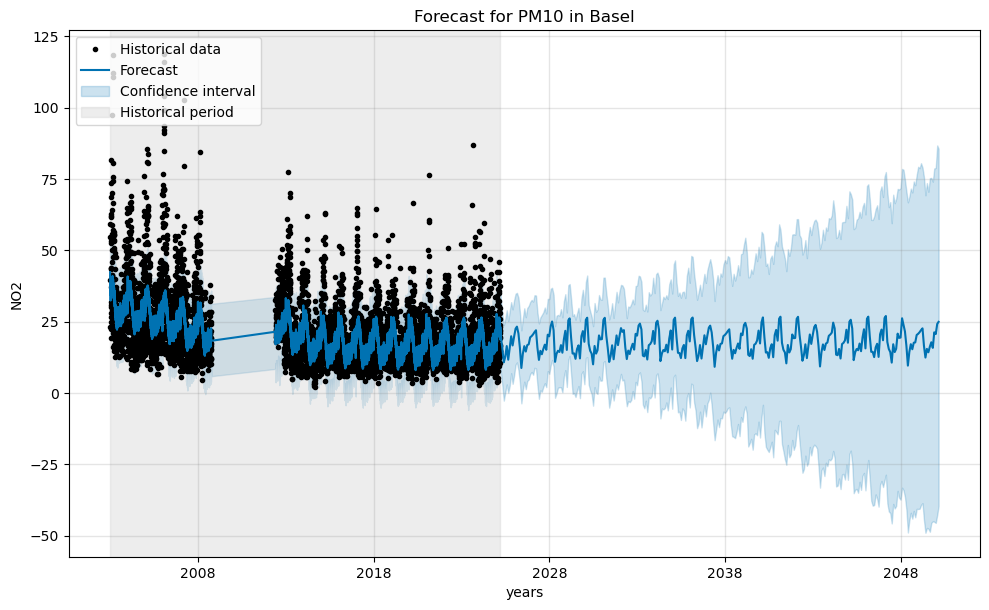

In [22]:
import matplotlib.pyplot as plt

cutoff = df_basel['ds'].max()

fig1 = model_basel.plot(forecast_basel)
plt.xlabel("years") 
plt.ylabel("NO2")
plt.title("Forecast for PM10 in Basel")
plt.axvspan(forecast_basel['ds'].min(), cutoff, color='lightgrey', alpha=0.4, label='Historical period')
plt.legend(["Historical data", "Forecast", "Confidence interval", "Historical period"], loc="upper left")

fig1.savefig('images/forecast_PM10_basel.png', dpi=300, bbox_inches='tight')

In [23]:
import os

output_path = os.path.join("prediction-results", "air_PM10_basel-predict.csv")

forecast_basel.to_csv(output_path, index=False)

print(f"Saved predictions to: {output_path}")

Saved predictions to: prediction-results/air_PM10_basel-predict.csv


23:23:33 - cmdstanpy - INFO - Chain [1] start processing
23:23:33 - cmdstanpy - INFO - Chain [1] done processing
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the 

Saved predictions to: prediction-results/air_PM10_fribourg-predict.csv


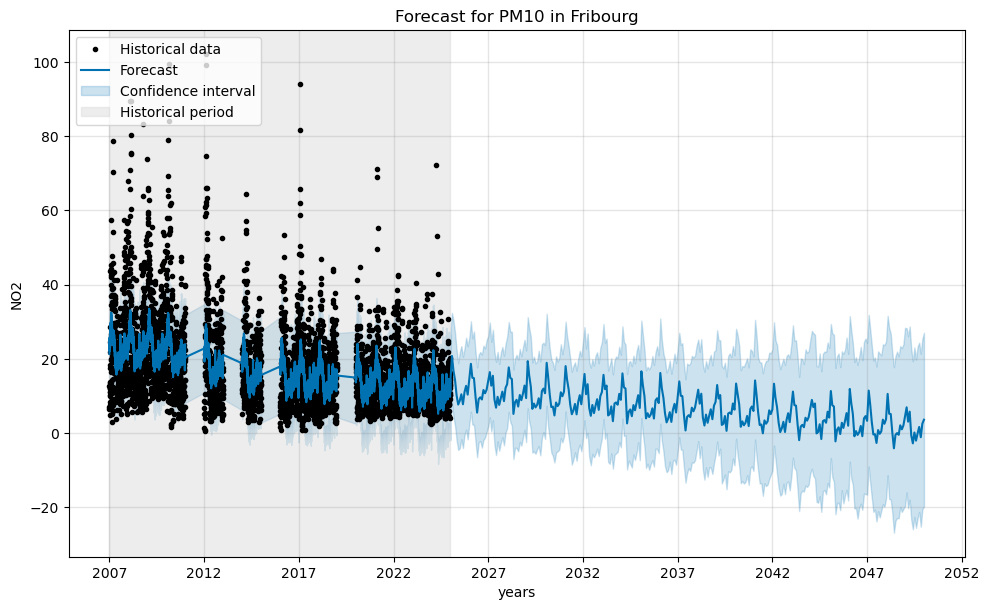

In [24]:
df_fribourg = pd.read_csv('data/air_PM10_data_fribourg.csv', names=["ds", "y"], header=0)
df_fribourg.head()

model_fribourg = Prophet()
model_fribourg.add_country_holidays(country_name='CH')
model_fribourg.fit(df_fribourg)

future_fribourg = model_fribourg.make_future_dataframe(periods=12*25, freq='M')

forecast_fribourg = model_fribourg.predict(future_fribourg)
forecast_fribourg[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

cutoff = df_fribourg['ds'].max()

fig1 = model_fribourg.plot(forecast_fribourg)
plt.xlabel("years") 
plt.ylabel("NO2")
plt.title("Forecast for PM10 in Fribourg")
plt.axvspan(forecast_fribourg['ds'].min(), cutoff, color='lightgrey', alpha=0.4, label='Historical period')
plt.legend(["Historical data", "Forecast", "Confidence interval", "Historical period"], loc="upper left")

fig1.savefig("images/air_PM10_fribourg-forecast.png", dpi=300, bbox_inches='tight')

output_path = os.path.join("prediction-results", "air_PM10_fribourg-predict.csv")
forecast_fribourg.to_csv(output_path, index=False)

print(f"Saved predictions to: {output_path}")